## 농산물 가격 예측 AI 경진대회 원예적 기준으로 클러스터링
### 0. 패키지 & 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
train = pd.read_csv('public_data/train.csv')
train.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [4]:
price = train.iloc[:, 3::2]
price

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),...,당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,329.0,360.0,1281.0,11000.0,5475.0,1704.0,1331.0,348.0,13242.0,2339.0,...,804.0,3703.0,2576.0,1474.0,1621.0,9235.0,2109.0,2414.0,2014.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,478.0,382.0,1235.0,4464.0,5210.0,1716.0,1212.0,345.0,9923.0,2153.0,...,794.0,4871.0,2440.0,1750.0,1834.0,7631.0,2046.0,2018.0,3885.0,0.0
4,442.0,422.0,1213.0,4342.0,5387.0,1715.0,1197.0,350.0,9529.0,2220.0,...,763.0,5129.0,2437.0,1822.0,1833.0,6926.0,2268.0,2178.0,2853.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1839.0,990.0,990.0,19101.0,4775.0,2380.0,1868.0,1143.0,10028.0,6329.0,...,1565.0,9206.0,2927.0,2545.0,5587.0,4509.0,3001.0,3426.0,3620.0,10940.0
1729,1789.0,1011.0,955.0,23095.0,5039.0,2239.0,2047.0,1090.0,10921.0,6262.0,...,1773.0,9084.0,2994.0,2598.0,5596.0,4178.0,2999.0,3357.0,3618.0,10844.0
1730,1760.0,1075.0,961.0,22510.0,5565.0,2126.0,2095.0,1326.0,10607.0,7123.0,...,1405.0,9198.0,2942.0,2617.0,5262.0,3770.0,3065.0,3092.0,3691.0,10636.0
1731,3066.0,1139.0,1056.0,22333.0,5227.0,1866.0,798.0,998.0,12195.0,7178.0,...,3750.0,0.0,2946.0,2573.0,3781.0,4076.0,3707.0,3252.0,3567.0,10699.0


### 01. 원예적 기준으로 분리 및 EDA

In [23]:
fruits = ['샤인마스캇', '토마토', '백다다기', '애호박', '건고추', '파프리카', '캠벨얼리']
miscellaneous = ['새송이', '팽이버섯']
leafy = ['미나리', '시금치', '청상추', '배추', '얼갈이배추', '양배추', '깻잎']
light = ['마늘', '양파', '대파']
root = ['무', '당근']

In [31]:
def make_EDA(data):
    data_frame = pd.DataFrame()

    for i in data :
        new_data = price['%s_가격(원/kg)'%i]
        data_frame = pd.concat([data_frame,new_data],axis=1)

    return data_frame

In [32]:
fruits = make_EDA(fruits)
miscellaneous = make_EDA(miscellaneous)
leafy = make_EDA(leafy)
light = make_EDA(light)
root = make_EDA(root)

In [33]:
fruits

,샤인마스캇_가격(원/kg),토마토_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),건고추_가격(원/kg),파프리카_가격(원/kg),캠벨얼리_가격(원/kg)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1621.0,2109.0,2414.0,11000.0,3703.0,2014.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1834.0,2046.0,2018.0,4464.0,4871.0,3885.0
4,0.0,1833.0,2268.0,2178.0,4342.0,5129.0,2853.0
...,...,...,...,...,...,...,...
1728,10940.0,5587.0,3001.0,3426.0,19101.0,9206.0,3620.0
1729,10844.0,5596.0,2999.0,3357.0,23095.0,9084.0,3618.0
1730,10636.0,5262.0,3065.0,3092.0,22510.0,9198.0,3691.0
1731,10699.0,3781.0,3707.0,3252.0,22333.0,0.0,3567.0


In [41]:
def data_EDA(data):
    data.plot(figsize=(15,10),kind='line')
    plt.title('cluster 시계열 그래프')
    plt.legend(fontsize=10,loc='upper left')
    plt.show()

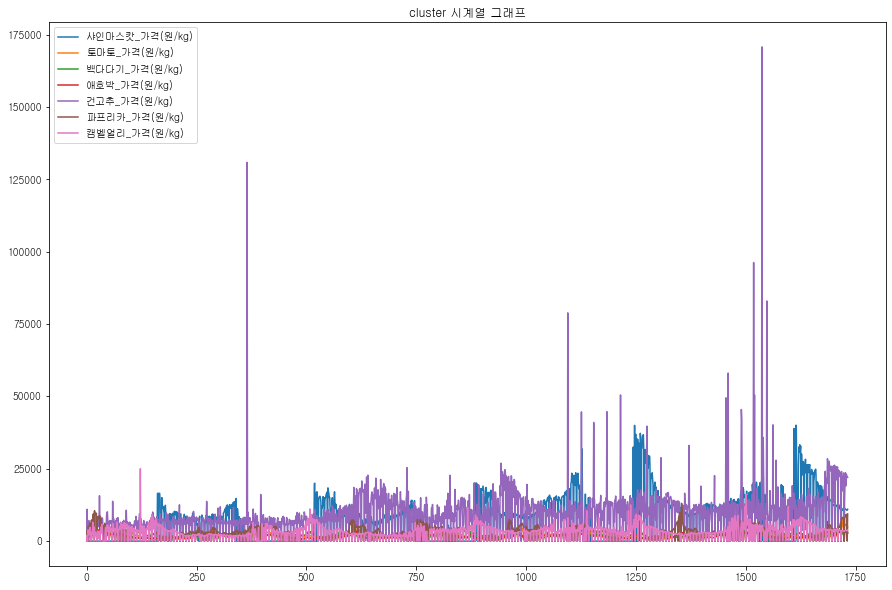

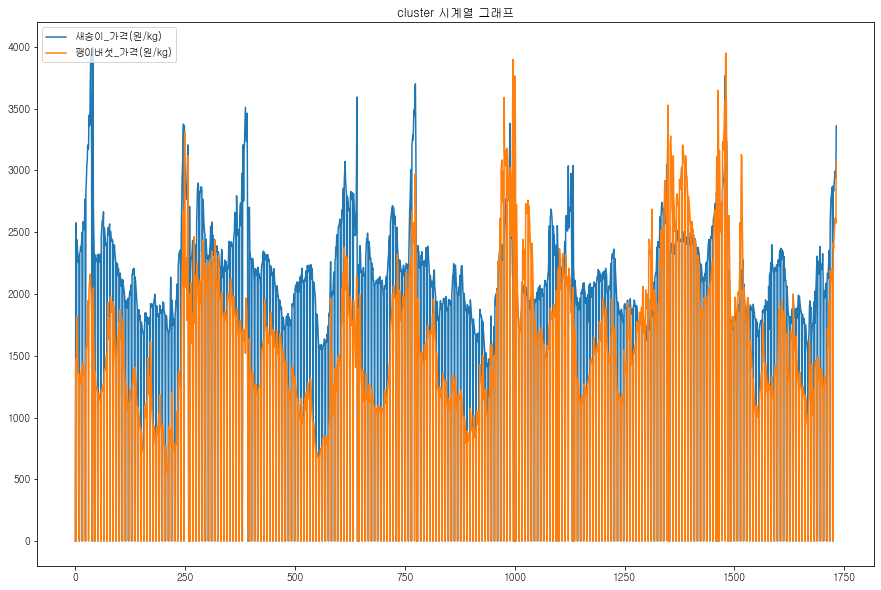

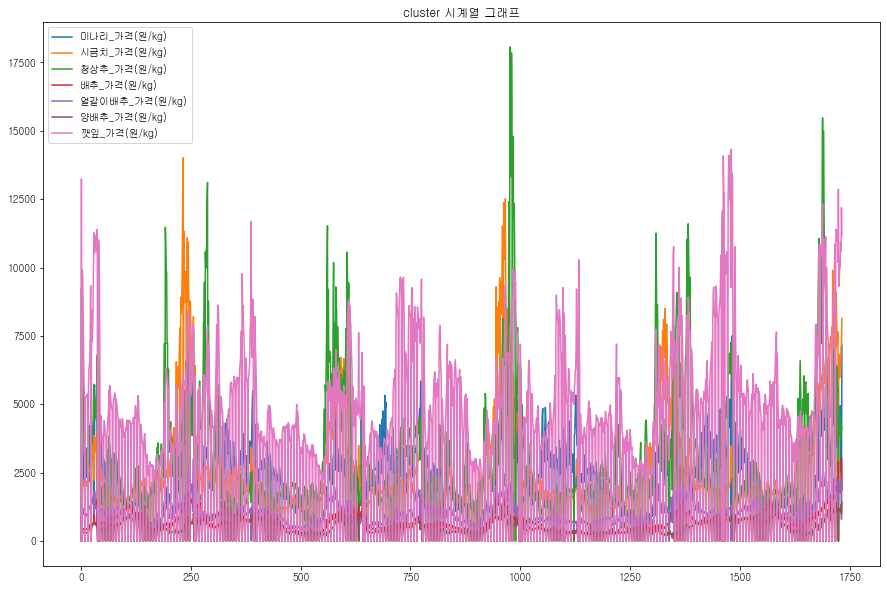

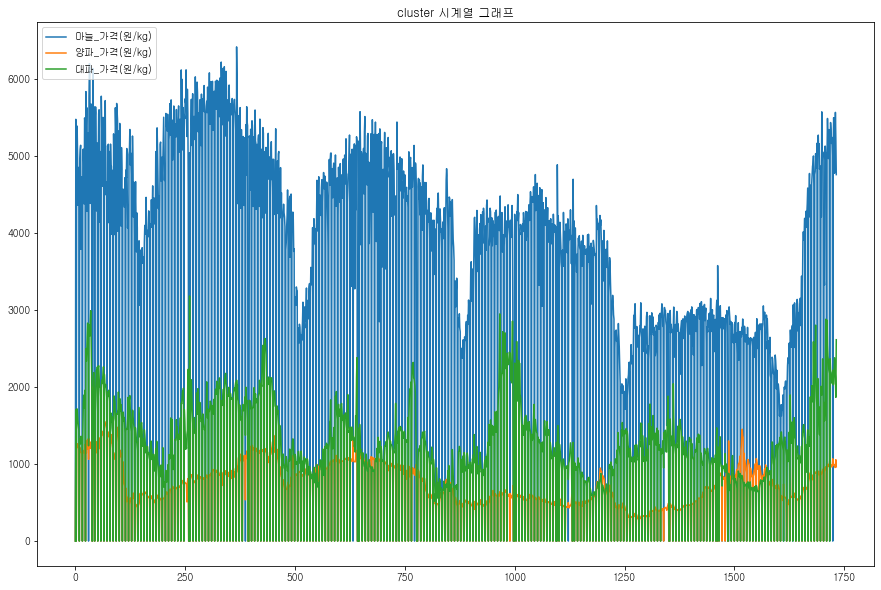

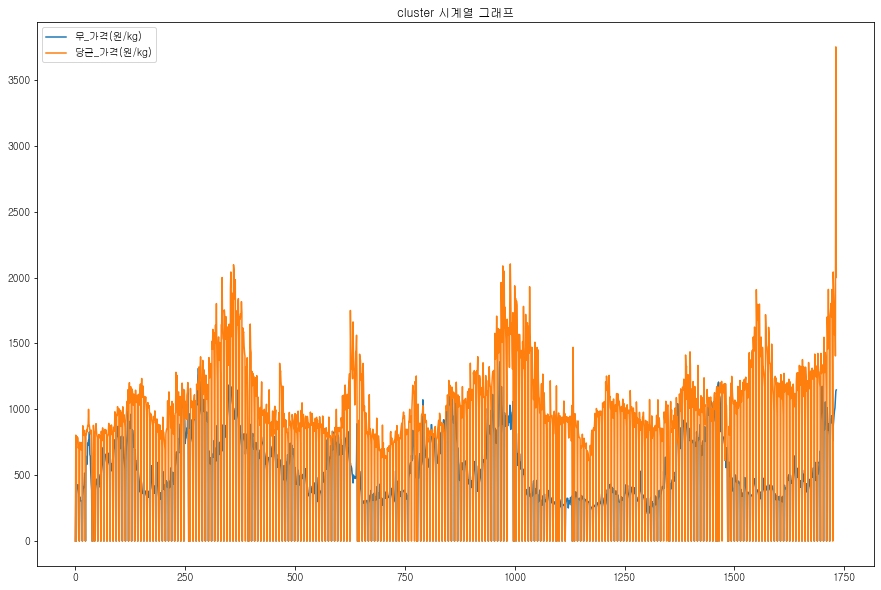

In [42]:
data_EDA(fruits)
data_EDA(miscellaneous)
data_EDA(leafy)
data_EDA(light)
data_EDA(root)